In [1]:
import sys
sys.path.insert(1, '/home/sam/Documents/network/supernode/lightsupernode/')

In [2]:
import torch
from concepts.concepts import *
from concepts.transformations import AddSupernodes
from torch_geometric.datasets import TUDataset

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [4]:
import matplotlib.pyplot as plt
import torch
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree
import numpy as np
import networkx as nx
from torch_geometric.utils import from_networkx, to_networkx

def visualize(g, transf, set_labels=None):
    if set_labels:
        set_labels = nx.get_node_attributes(g, set_labels) 
        
    if transf:
        ntype = set(nx.get_node_attributes(g, "ntype").values())
        ntype.remove('ORIG')
        
        nx.draw_networkx(G=g, pos=nx.spring_layout(g, np.random.seed(1234)), 
                     node_color=['#1f78b4' if n=='ORIG' else '#1fffff' for n in nx.get_node_attributes(g, "ntype").values()],
                     labels = set_labels
                    )
    else:
        nx.draw_networkx(G=g, pos=nx.spring_layout(g, np.random.seed(1234)), labels = set_labels)

def showConcepts(g, k, v):
    N = list(g.neighbors(k))
    N.append(k)
    
    print(list(g.neighbors(k)), v, k)
    nx.draw_networkx(G=g, pos=nx.spring_layout(g, np.random.seed(1234)), 
                 node_color=['#1fffff' if n in N else '#1f78b4' for n in nx.nodes(g)]                    )
    plt.show()



In [5]:
dataset = TUDataset(root="./dataset/TUD", name='MUTAG')

In [6]:
data = dataset[0]
print(data.is_undirected())
print(data)

True
Data(edge_index=[2, 38], x=[17, 7], edge_attr=[38, 4], y=[1])


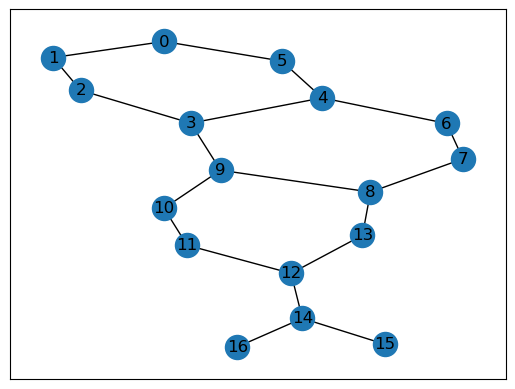

In [7]:
data = dataset[0]
g = to_networkx(data, to_undirected=True, node_attrs=["x"], graph_attrs=["y"])
visualize(g, False)

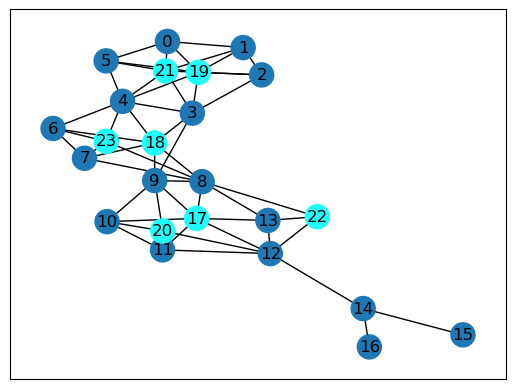

In [8]:
concepts_list_ex = [
       {"name": "GCB", "fun": cycle_basis, "args": []},
       {"name": "GMC", "fun": max_cliques, "args": []},
       {"name": "GLP2", "fun": line_paths, "args": []}
    ]

dataset.transform = AddSupernodes(concepts_list_ex)
data = dataset[0]
g = to_networkx(data, to_undirected=True, node_attrs=["x", "ntype"], graph_attrs=["y"])
visualize(g, True)

In [9]:
print(dataset[0])

Data(x=[24, 7], edge_index=[2, 108], y=[1], ntype=[24], S=[24], edge_S=[108, 1])


In [15]:
dataset = TUDataset(root="./dataset/TUDT", name='MUTAG', pre_transform=AddSupernodes(concepts_list_ex))

In [11]:
data = dataset[0]

In [12]:
# pooling
#x_dict = {key: global_mean_pool(data[key].x, data[key].batch) for key in data.node_types}
#out = torch.stack(x_dict.values(), dim=0).sum(dim=0)

In [14]:
import sys
sys.path.insert(1, '/home/sam/Documents/network/supernode/lightsupernode/')
from models.MyConv import IdentityConv
print(data.x)
conv = IdentityConv()
conv(data.x, data.edge_index)

tensor([[1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.]])


tensor([[4., 2., 2., 2., 2., 2., 2.],
        [4., 2., 2., 2., 2., 2., 2.],
        [4., 2., 2., 2., 2., 2., 2.],
        [6., 3., 3., 3., 3., 3., 3.],
        [7., 4., 4., 4., 4., 4., 4.],
        [4., 2., 2., 2., 2., 2., 2.],
        [4., 2., 2., 2., 2., 2., 2.],
        [4., 2., 2., 2., 2., 2., 2.],
        [7., 4., 4., 4., 4., 4., 4.],
        [6., 3., 3., 3., 3., 3., 3.],
        [4., 2., 2., 2., 2., 2., 2.],
        [4., 2., 2., 2., 2., 2., 2.],
        [5., 4., 3., 3., 3., 3., 3.],
        [4., 2., 2., 2., 2., 2., 2.],
        [1., 0., 2., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [6., 0., 0., 0., 0., 0., 0.],
        [6., 0., 0., 0., 0., 0., 0.],
        [6., 0., 0., 0., 0., 0., 0.],
        [4., 0., 0., 0., 0., 0., 0.],
        [6., 0., 0., 0., 0., 0., 0.],
        [3., 0., 0., 0., 0., 0., 0.],
        [4., 0., 0., 0., 0., 0., 0.]])